
## Context
This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

## Content
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:


About this file

Add Suggestion
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housing_median_age: Median age of a house within a block; a lower number is a newer building
4. total_rooms: Total number of rooms within a block
5. total_bedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. median_house_value: Median house value for households within a block (measured in US Dollars)
10. ocean_proximity: Location of the house w.r.t ocean/sea

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('housing.csv')

## Motivación: Quiero vender mi casa, ¿en cuanto la vendo? 



## Ubicación

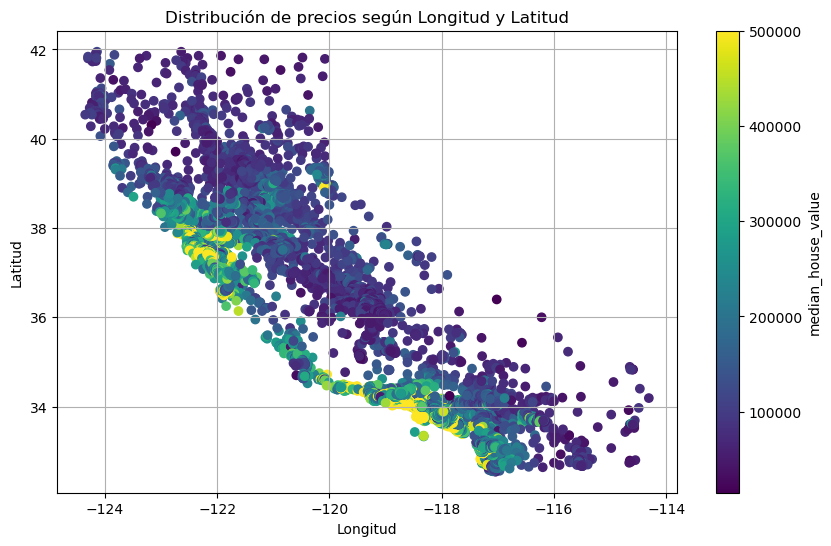

In [4]:
plt.figure(figsize=(10, 6))

# Primer scatter para los puntos de color según el valor de 'median_house_value'
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'])

# Agregar una barra de color que representa 'median_house_value'
plt.colorbar(scatter, label='median_house_value')

# Agregar una cuadrícula
plt.grid(True)

# Etiquetas y título
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución de precios según Longitud y Latitud')
plt.show();

In [5]:
df.median_house_value.mean()

206855.81690891474

In [6]:
df.median_house_value.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

Primer insight (no tan sorprendente) las casas más caras están cerca de la playa

## Edad de la casa

Text(0.5, 0, 'Edad media de las casas')

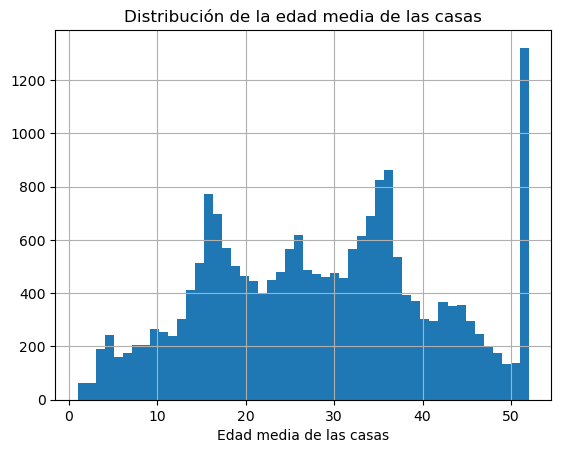

In [7]:
df.housing_median_age.hist(bins=50)
plt.title("Distribución de la edad media de las casas")
plt.xlabel("Edad media de las casas")

Casas nuevas y michas casas viejas 

## Cuartos 

Cuartos promedio por casa en cada bloque 

## Population

## Households

## Ingreso del hogar

## Cercania con el oceano 

### Supongamos que mi ingreso mensual es de $3,400 dolares, ¿en cuanto podría vender mi casa aproximadamente?

Podría sacar el promedio de las casas que valen $3,400 

Supongamos que mi ingreso mensual es de $9,000 dolares, ¿en cuanto podría vender mi casa aproximadamente?

No hay datos, pero intuitivamente uno pude pensar que si el ingreso mensual de una familia es de 9,000 dolares la casa vale más que uno de 8,000 pero menos que una de 10,000.

Es decir, a mayor ingreso familiar, mayor precio de la cas ...¿pero que tanto sube?

Problema1: se puso un tope de 500K dolares a las casas más caras 

En total, 4.6% de las casas tienen el mismo precio topado, vamos a eliminar estos casos

Con esta vista, no hay datos disponibles para poder estimar cunato cuesta una casa en un ingreso familiar premium, pero claramente serían más caras

La idea es venderle casas a millonarios, pero no tengo datos de esa clase de hogares. ¿Cómo le podemos hacer?

### Percentiles 

Percentiles del valor mediano de las casas, crea 5 bines

10 bins

### Analisis bivariado 

Agrupar en bins y ver como es el promedio de mi variable a predecir 


Inicio: median house age

In [8]:
# del df['ocean_proximity']

## Analisis bivariado del total de cuartos

### Bivariado median_house_value